# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState


pd.options.mode.chained_assignment = None
RANDOM_STATE = RandomState(77777)

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
try:
    geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    geo_data_0 = pd.read_csv('C:\\D\\Project\\datasets\\geo_data_0.csv')
    geo_data_1 = pd.read_csv('C:\\D\\Project\\datasets\\geo_data_1.csv')
    geo_data_2 = pd.read_csv('C:\\D\\Project\\datasets\\geo_data_2.csv')

**Первый регион**

In [3]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
geo_data_0['id'].duplicated().sum()

10

In [6]:
geo_data_0[geo_data_0['id'].duplicated(False)].sort_values('id')

,id,f0,f1,f2,product
66136,74z30,1.084962,-0.312358,6.990771,127.643327
64022,74z30,0.741456,0.459229,5.153109,140.771492
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
42529,AGS9W,1.454747,-0.479651,0.683380,126.370504
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
1949,QcMuo,0.506563,-0.323775,-2.215583,75.496502


In [7]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


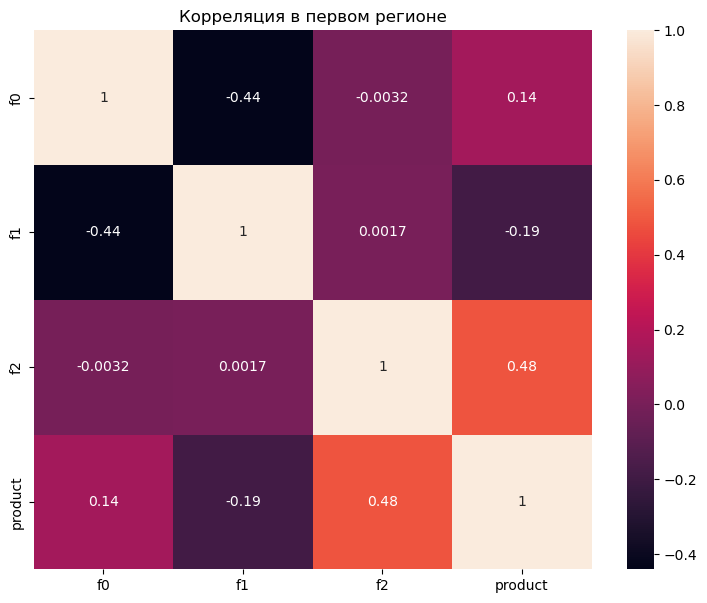

In [8]:
plt.figure(figsize=(9,7))
sns.heatmap(geo_data_0.corr(), annot=True)
plt.title('Корреляция в первом регионе')
plt.show()

Корреляция по шкале Чеддока:
- Признак f0 коррелирует с f1 (умеренно отрицательно) и product (слабо положительно);
- Признак f1 коррелирует с product (слабо отрицательно);
- Признак f2 коррелирует с product (умеренно положительно).

![Шкала Чеддока](https://intuit.ru/EDI/22_08_23_1/1692656410-28489/tutorial/25/objects/8/files/8_1.gif)

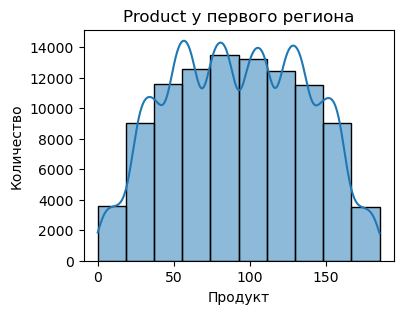

In [9]:
plt.figure(figsize=(4,3))
sns.histplot(data=geo_data_0, x='product', kde=True, bins=10)
plt.xlabel('Продукт')
plt.ylabel('Количество')
plt.title('Product у первого региона')
plt.show()

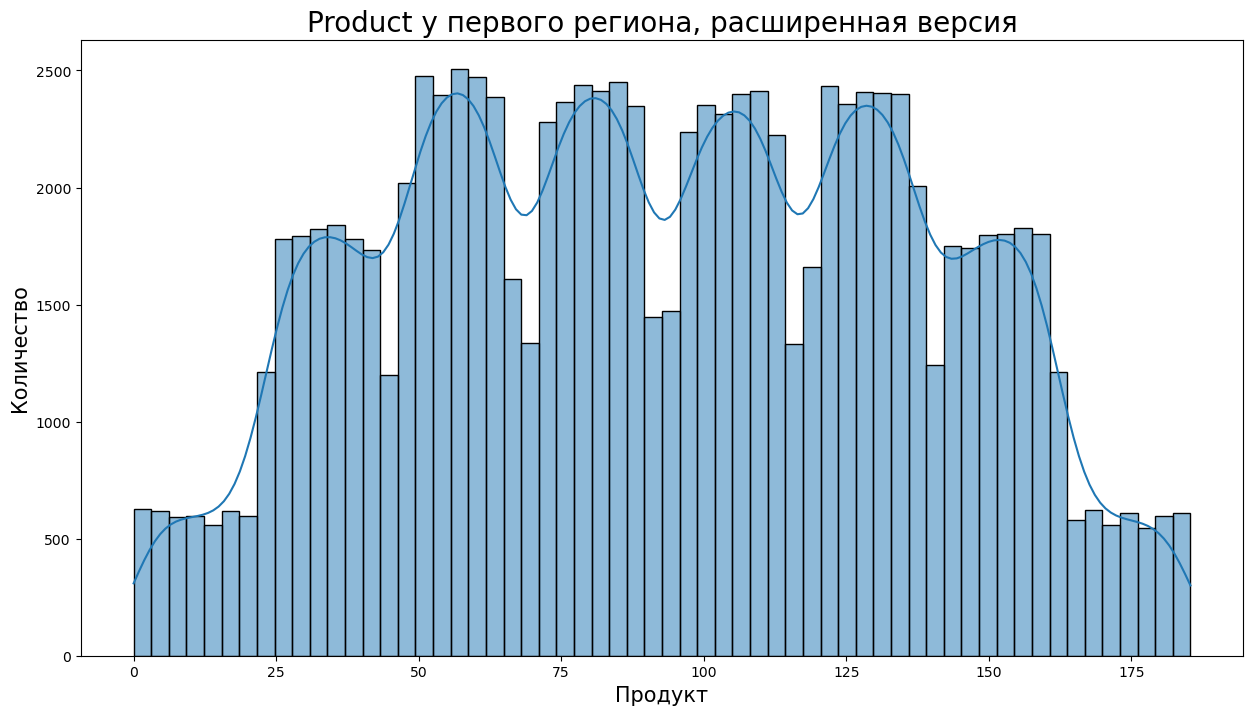

In [10]:
plt.figure(figsize=(15,8))
sns.histplot(data=geo_data_0, x='product', kde=True)
plt.title('Product у первого региона, расширенная версия', fontsize=20)
plt.xlabel('Продукт', fontsize=15)
plt.ylabel('Количество', fontsize=15)
plt.show()

**Второй регион**

In [11]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [13]:
geo_data_1['id'].duplicated().sum()

4

In [14]:
geo_data_1[geo_data_1['id'].duplicated(False)].sort_values('id')

,id,f0,f1,f2,product
5849,5ltQ6,-3.435401,-12.296043,1.999796,57.085625
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
2721,bfPNe,-9.494442,-5.463692,4.006042,110.992147
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


In [15]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


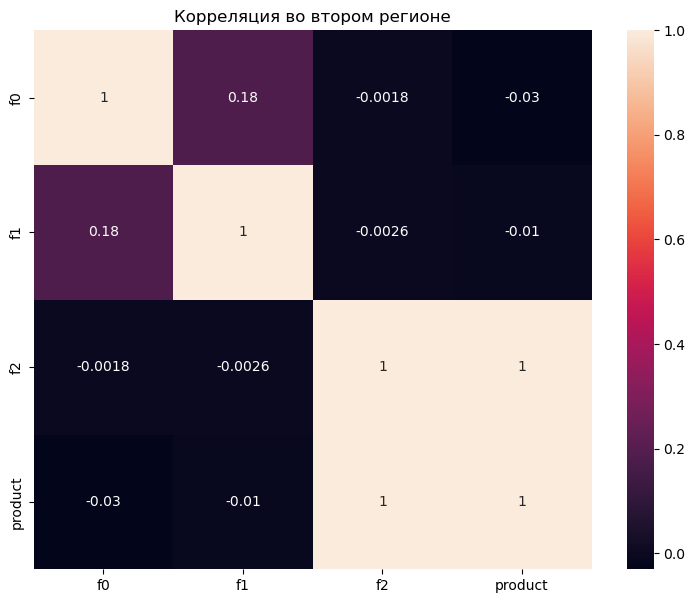

In [16]:
plt.figure(figsize=(9,7))
sns.heatmap(geo_data_1.corr(), annot=True)
plt.title('Корреляция во втором регионе')
plt.show()

Корреляция по шкале Чеддока:
- Признак f0 коррелирует с f1 (слабо положительно);
- Признак f2 коррелирует с product (весьма высоко положительно).

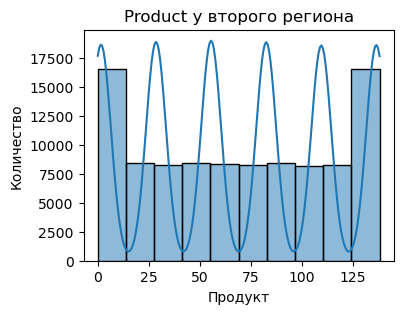

In [17]:
plt.figure(figsize=(4,3))
sns.histplot(data=geo_data_1, x='product', kde=True, bins=10)
plt.title('Product у второго региона')
plt.xlabel('Продукт')
plt.ylabel('Количество')
plt.show()

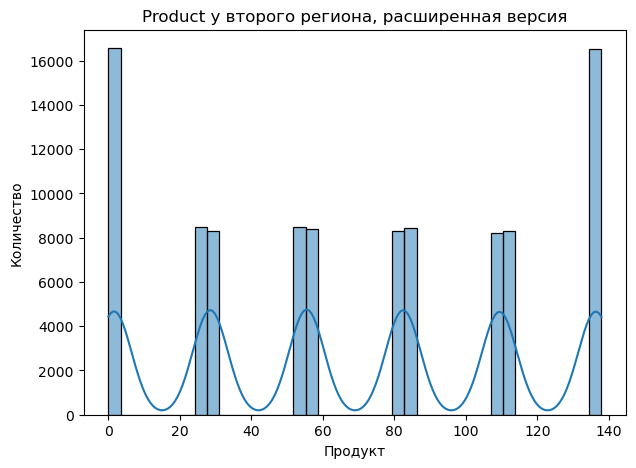

In [18]:
plt.figure(figsize=(7,5))
sns.histplot(data=geo_data_1, x='product', kde=True)
plt.title('Product у второго региона, расширенная версия')
plt.xlabel('Продукт')
plt.ylabel('Количество')
plt.show()

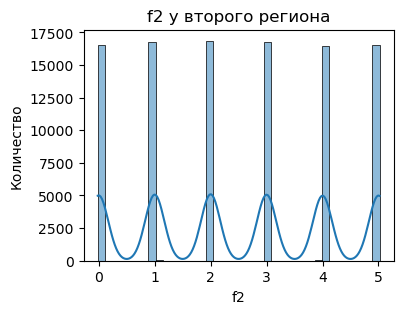

In [19]:
plt.figure(figsize=(4,3))
sns.histplot(data=geo_data_1, x='f2', kde=True)
plt.title('f2 у второго региона')
plt.xlabel('f2')
plt.ylabel('Количество')
plt.show()

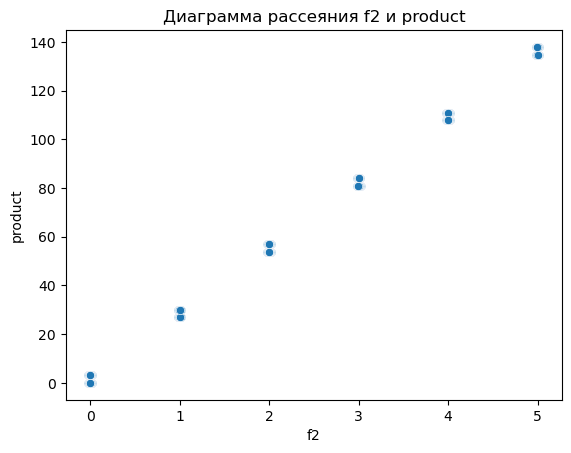

In [20]:
sns.scatterplot(data=geo_data_1, x='f2', y='product')
plt.title('Диаграмма рассеяния f2 и product')
plt.show()

**Третий регион**

In [21]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [22]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [23]:
geo_data_2['id'].duplicated().sum()

4

In [24]:
geo_data_2[geo_data_2['id'].duplicated(False)]

,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
28039,xCHr8,1.633027,0.368135,-2.378367,6.120525
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
44378,Vcm5J,-1.229484,-2.439204,1.222909,137.968290
45404,KUPhW,0.231846,-1.698941,4.990775,11.716299
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


In [25]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


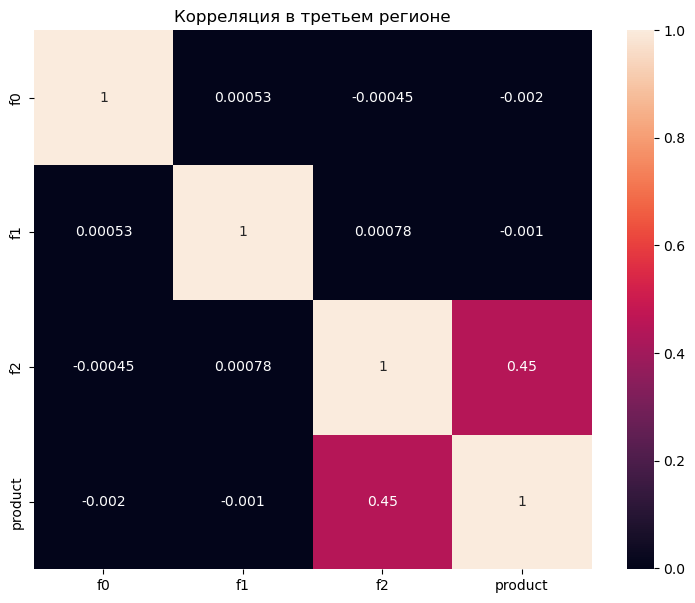

In [26]:
plt.figure(figsize=(9,7))
sns.heatmap(geo_data_2.corr(), annot=True)
plt.title('Корреляция в третьем регионе')
plt.show()

Корреляция по шкале Чеддока:
- Признак f2 коррелирует с product (умеренно положительно).

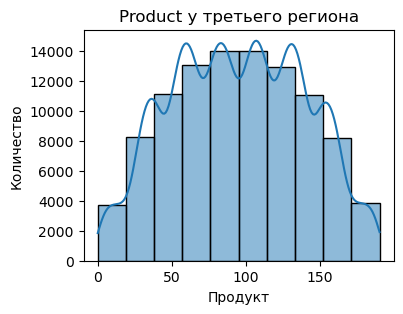

In [27]:
plt.figure(figsize=(4,3))
sns.histplot(data=geo_data_2, x='product', kde=True, bins=10)
plt.title('Product у третьего региона')
plt.xlabel('Продукт')
plt.ylabel('Количество')
plt.show()

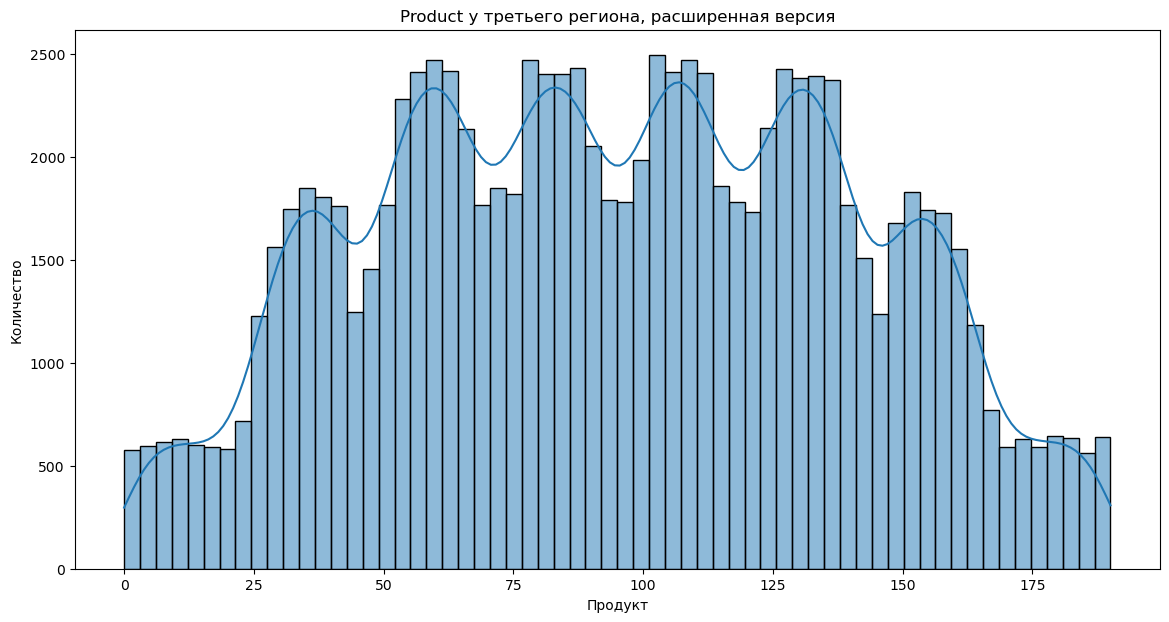

In [28]:
plt.figure(figsize=(14,7))
sns.histplot(data=geo_data_2, x='product', kde=True)
plt.title('Product у третьего региона, расширенная версия')
plt.xlabel('Продукт')
plt.ylabel('Количество')
plt.show()

**Вывод:** В данных отсутствуют пропуски. Были дубликаты во всех регионах, либо была допущена ошибка в id, либо замеры были произведены несколько раз. Удалять их не буду. У первого и третьего регионов мультимодальное распределение. У второго региона - биномальное распределение.

У второго региона сильная корреляция между f2 и product, то есть по f2 проще будет предсказать product.

Признак id можно удалить, он не дает модели никакой ценной информации.

In [29]:
geo_data_0.drop(['id'], axis=1, inplace=True)
geo_data_1.drop(['id'], axis=1, inplace=True)
geo_data_2.drop(['id'], axis=1, inplace=True)

## Обучение и проверка модели

Условия задачи:
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

In [30]:
def train_and_valid_split(dataframe):
    '''
    функция, разбивающая на обучающую и валидационную выборки
    просто чтобы не писать один и тот же код для каждого региона
    
    '''
    features = dataframe.drop(['product'], axis=1)
    target = dataframe['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features,
        target,
        test_size=0.2,
        random_state=RANDOM_STATE)
    print(features_train.shape, features_valid.shape)
    col = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train[col] = scaler.transform(features_train[col])
    features_valid[col] = scaler.transform(features_valid[col])
    return features_train, features_valid, target_train, target_valid


def model_study(features_train, target_train, features_valid, target_valid):
    '''функция, которая возвращает модель, предсказание модели и rmse'''
    model = LinearRegression()
    model.fit(features_train, target_train)
    pred = model.predict(features_valid)
    rmse = mean_squared_error(target_valid, pred)**0.5
    print(f'RMSE = {round(rmse,3)}, средний запас предсказанного сырья = {round(pred.mean(), 2)}')
    return model, pred, rmse

**Модель первого региона**

In [31]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_and_valid_split(geo_data_0)

(80000, 3) (20000, 3)


In [32]:
model_0, pred_0, rmse_0 = model_study(features_train_0, target_train_0, features_valid_0, target_valid_0)

RMSE = 37.704, средний запас предсказанного сырья = 92.39


**Модель второго региона**

In [33]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_and_valid_split(geo_data_1)
model_1, pred_1, rmse_1 = model_study(features_train_1, target_train_1, features_valid_1, target_valid_1)

(80000, 3) (20000, 3)
RMSE = 0.893, средний запас предсказанного сырья = 68.8


**Модель третьего региона**

In [34]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_and_valid_split(geo_data_2)
model_2, pred_2, rmse_2 = model_study(features_train_2, target_train_2, features_valid_2, target_valid_2)

(80000, 3) (20000, 3)
RMSE = 39.95, средний запас предсказанного сырья = 95.07


**Первый регион**
- RMSE = 37.498
- Средний запас предсказанного сырья = 92.35

**Второй регион**
- RMSE = 0.891
- Средний запас предсказанного сырья = 69.15

**Третий регион**
- RMSE = 40.34
- Средний запас предсказанного сырья = 95.15

**Вывод:** У первого и третьего региона RMSE и средний запас предсказанного сырья +- одинаковые, подозреваю, что это связано с практически одинаковым размером и распределением данных.

У второго региона самый маленький RMSE и средний запас предсказанного сырья - маленькая ошибка связана с сильной корреляцией f2 и целевого признака product, а маленький средний запас предсказанного сырья связан с распределение - много скважин с маленьким запасом сырья и мало скважин с аномально большим запасом.

## Подготовка к расчёту прибыли

Условия задачи:
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [35]:
def profit_and_roi(region):
    reg = {0: geo_data_0, 1: geo_data_1, 2: geo_data_2}
    prod = reg[region]["product"].mean() 
    cost = prod * COST_OF_ONE
    profit = cost - budget_for_one_point / 1_000
    roi = round(profit / (budget_for_one_point / 1_000) * 100, 2)
    print(f'Средняя добыча в {region + 1} регионе: {round(prod, 2)} тыс. баррелей')
    print(f'Стоимость: {round(cost / 1_000, 2)} млн. руб.')
    print(f'Средняя прибыль: {round(profit / 1_000, 2)} млн. руб.')
    print(f'ROI: {roi} %')
    return roi

In [36]:
POINT = 500
BEST = 200
BUDGET = 10_000_000_000
COST_OF_ONE = 450
LOSS = 0.025

In [37]:
budget_for_one_point = BUDGET / BEST
print(f'Бюджет для одной скважины: {int(budget_for_one_point/1_000_000)} млн. руб.')

Бюджет для одной скважины: 50 млн. руб.


In [38]:
print(f'Достаточный объём сырья для безубыточной разработки новой скважины: {round(budget_for_one_point / (COST_OF_ONE * 1_000), 1)} тыс. баррелей')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.1 тыс. баррелей


**Первый регион**

In [39]:
roi_0 = profit_and_roi(0)

Средняя добыча в 1 регионе: 92.5 тыс. баррелей
Стоимость: 41.62 млн. руб.
Средняя прибыль: -8.38 млн. руб.
ROI: -16.75 %


**Второй регион**

In [40]:
roi_1 = profit_and_roi(1)

Средняя добыча в 2 регионе: 68.83 тыс. баррелей
Стоимость: 30.97 млн. руб.
Средняя прибыль: -19.03 млн. руб.
ROI: -38.06 %


**Третий регион**

In [41]:
roi_2 = profit_and_roi(2)

Средняя добыча в 3 регионе: 95.0 тыс. баррелей
Стоимость: 42.75 млн. руб.
Средняя прибыль: -7.25 млн. руб.
ROI: -14.5 %


**Вывод:** Если смотреть по среднему у всех регионов, то ни у одного региона не получается окупить инвестицию. Но нам нужно не все 10к скважин, где есть не только прибыльные, но и убыточные точки, а лучшие 200.

## Расчёт прибыли и рисков 

In [42]:
def best_200(target, predict):
    predict = predict.sort_values(ascending=False)
    target = target[predict.index][:200]
    return target.sum() * COST_OF_ONE * 1_000 - BUDGET
    
def bootstrap(predict, target):
    values = []
    predict = pd.Series(predict, index=target.index)
    for _ in range(1000):
        probs_pred = predict.sample(n=POINT, replace=True, random_state=RANDOM_STATE)
        values.append(best_200(target, probs_pred))
        
    values = pd.Series(values)
    lower_values = values.quantile(0.025)
    upper_values = values.quantile(0.975)
    mean_values = values.mean()
    risk_values = (values < 0).mean()
    print(f'Средняя прибыль: {round(mean_values, 2)} руб.')
    print(f'95%-й доверительный интервал прибыли расположен между {round(lower_values, 2)} и {round(upper_values, 2)} руб.')
    print(f'Риск убытков: {round(risk_values * 100, 2)}%')
    if risk_values < LOSS:
        print('Регион рекомендован')
    else:
        print('Регион будет убыточным')
        
    

**Первый регион**

In [43]:
bootstrap(pred_0, target_valid_0)

Средняя прибыль: 367801616.51 руб.
95%-й доверительный интервал прибыли расположен между -133240253.73 и 861440074.9 руб.
Риск убытков: 6.6%
Регион будет убыточным


**Второй регион**

In [44]:
bootstrap(pred_1, target_valid_1)

Средняя прибыль: 449936895.57 руб.
95%-й доверительный интервал прибыли расположен между 68063072.54 и 861645863.77 руб.
Риск убытков: 0.8%
Регион рекомендован


**Третий регион**

In [45]:
bootstrap(pred_2, target_valid_2)

Средняя прибыль: 394030366.53 руб.
95%-й доверительный интервал прибыли расположен между -126744841.88 и 884060930.37 руб.
Риск убытков: 7.6%
Регион будет убыточным


**Вывод:** Единственный неубыточным оказался второй регион, при том, что у него самая большая средняя прибыль:
- Средняя прибыль: 449936895.57 руб.
- 95%-й доверительный интервал прибыли расположен между 68063072.54 и 861645863.77 руб..
- Риск убытков: 0.8%.

## Общий вывод

У первого и третьего региона наблюдается мультимодальное распределение, у второго региона бимодальное. На втором региона у целевого признака высокая положительаня зависимость с признаком f2, поэтому легче предсказать прибыль. RMSE у первого и третьего регионов +- схожи, тк. данные совпадают по размеру и распределению. Меньше всего RMSE у второго региона.

Бюджет для одной скважины равен 50 млн. руб, это примерно 111.1 тыс. баррелей. Несмотря на среднюю добычу по регионам (первый регион 92.5 тыс. баррелей, второй регион 68.82 тыс. баррелей и третий регион 95.0 тыс. баррелей), второй регион оказался менее рисковый и единственный прибыльный. По итогу, второй регион имеет характеристики:

- Средняя прибыль: 449936895.57 руб.
- 95%-й доверительный интервал прибыли расположен между 68063072.54 и 861645863.77 руб..
- Риск убытков: 0.8%.